# Análise Causal

Prof. Daniel de Abreu Pereira Uhr


### Conteúdo

* Introdução à Análise Causal: Identificação, Estimação e Inferência
* Modelos Causais em Grafos (*Directed Acyclic Graph* - DAG´s) 
  * Aspectos Gerais
  * Independência e Independência Condicional
  * Estruturas Básicas dos DAGs
  * Critério de Identificação Causal - *Back-Door Criterion*
  * Critério de Identificação Causal - *Front-Door Criterion*
  * Procedimentos para Estimação Causal
* Viéses na Análise Causal
* DAG como representação de experimentos
* Praticando com DAGs no Python
* Covariáveis e Variáveis de Controle


### Referências

* Cinelli, C., Forney, A., & Pearl, J. (2022). A Crash Course in Good and Bad Controls. Sociological Methods & Research, 53(3), 1071-1104. https://doi.org/10.1177/00491241221099552 (Original work published 2024) 
* Pearl, J. (2009). Causality: Models, reasoning and inference. Cambridge university press.
* Peral, J. (2014). Interpretation and Identification of Causal Mediation. Psychological Methods, Vol. 19, No. 4, 459–481.
* Spirtes, P., Glymour, C., & Scheines, R. (2000). Causation, prediction, and search. MIT press.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Morgan, S. L., & Winship, C. (2014). Counterfactuals and causal inference: Methods and principles for social research. Cambridge University Press. 
* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Facure, Matheus. Causal Inference for Brave and True. https://matheusfacure.github.io/python-causality-handbook/landing-page.html 
* Hernan, M. Causal Inference: What If (the book). https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/ 
* Matsueda, Ross L. 2012. “Handbook of Structural Equation Modeling.” In. Guilford Press.
* Heckman, James, and Rodrigo Pinto. 2015. “Causal Analysis After Haavelmo.” Econometric Theory 31 (1): 115–51.
* Imbens, Guido W. 2019. “Potential Outcome and Directed Acyclic Graph Approaches to Causality: Relevance for Empirical Practices in Economics.” NBER Working Paper Series. https://doi.org/10.3386/w26104.
* Marc F. Bellemare & Jeffrey R. Bloem. "The Paper of How: Estimating Treatment Effects Using the Front-Door Criterion".https://www.canr.msu.edu/afre/events/Bellemare%20and%20Bloem%20(2020).pdf



**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---


## Introdução à Análise Causal: Identificação, Estimação e Inferência Causal


### Identificação Causal

Identificação é a ponte entre teoria causal e dados observáveis: estabelece sob quais condições o efeito causal pode ser escrito como uma função da distribuição observada. Pode ser definida como ***o estudo teórico das condições necessárias para que um parâmetro causal possa ser recuperado a partir dos dados observáveis***. 

Em outras palavras, é a ideia de como derivar o efeito causal de uma variável sobre outra, com base na estrutura causal assumida (mapeada) e nos dados disponíveis (observáveis).
* Questão: “*Quais condições teóricas garantem que posso recuperar o efeito causal*?”
* Aqui entram:
  * **DAGs** (back-door, front-door).
  * **Conceitos** de exogeneidade, ignorabilidade, overlap.
  * **Definições** formais: ATE, ATT, ATU, CATE, LATE.
* ***"Estratégias" de identificação (Design/Quase-experimentos):*** (Estão definidas entre Identificação e Estimação Causal)
  * Os designs/quase-experimentos são estratégias que ***fornecem condições plausíveis para a identificação causal***. Eles não são estimadores em si, mas sim hipóteses de identificação que, uma vez aceitas, podem ser implementadas por diferentes técnicas de estimação (estimadores).
    * DiD: identifica sob a hipótese de tendências paralelas.
    * RDD: identifica sob a hipótese de continuidade no cutoff.
    * IV: identifica sob exogeneidade + relevância.
    * SC: identifica sob a hipótese de que uma combinação linear de controles reproduz o contrafactual.

* **Exemplos de perguntas:**
  * O efeito causal de X sobre Y pode ser identificado a partir da amostra disponível?
  * para isolar o efeito causal eu devo controlar por covariáveis, assumir tendências paralelas, regressão descontínua, variável instrumental?
  * ***Minha estratégia empírica gera um contrafactual crível?***


### Estimação Causal

* Questão: “Dado que identifiquei, como eu calculo o parâmetro com os dados observados?”. 
  * Então, dado que o parâmetro está identificado, a estimação causal trata de como ***computar esse parâmetro com base nos dados observados***.

* Aqui entram as **técnicas estatísticas/econometricas**:
  * **Imputação (modelagem de Y)** (outcome regression, Matching, PSM, TWFE).
  * **Reponderação (reponderação da amostra)** (IPW, entropy balancing, SC como implementação).
  * **Momentos (equações de momentos/condições ortogonais)** (IV, GMM, DoubleML, DID2S).

* Um mesmo "design" (Estratégia de identificação) pode ser implementado com ***diferentes técnicas de estimação*** (Estimadores):
  * **DiD:** regressão TWFE (imputação), synthetic DiD (weighting), DID2S (momentos).
  * **RDD:** regressão local polinomial (imputação), kernel weighting (reponderação).
  * **IV:** 2SLS (momentos), control function (imputação).

* **Exemplos de perguntas:**
  * Qual estimador devemos usar?
  * O estimador é consistente? Como lidar com amostras finitas?
  * ***Qual técnica é mais adequada para computar o contrafactual?***


### Inferência Causal

* Questão: “*Com que incerteza/confiança reporto minha estimativa?*”. 
  * Então, dada a estimação do parâmetro causal, a inferência causal ***trata da incerteza estatística: quantificar a precisão e significância da estimativa***.
* Aqui entram:
  * Erros-padrão robustos, clusterizados, HAC.
  * Bootstrap (clássico, wild cluster bootstrap).
  * Inferência assintótica vs. finita.
  * Intervalos de confiança e testes de hipóteses.

* **Exemplos de perguntas:**
  * Qual é o erro padrão da estimativa, e o intervalo de confiança para o efeito causal?
  * Posso rejeitar a hipótese nula de efeito nulo?
  * ***Quão precisa é a minha estimativa causal?***


### Identificação Causal com *Directed Acyclic Graphs* (DAGs)

A história da modelagem causal em grafos remonta ao início do século XX e a *Sewall Wright*, um dos pais da genética moderna e filho do economista *Philip Wright*. Sewall desenvolveu diagramas de caminhos para a genética, e acredita-se que Philip os adaptou para identificação econométrica. Mas, apesar desse início promissor, a utilização de modelos de grafos para inferência causal não é dominante na literatura. Foi **revitalizado para fins de inferência causal** quando o **cientista da computação e vencedor do Prêmio Turing de 2011, Judea Pearl** os adaptou para seu **trabalho em inteligência artificial**. Ele explicou isso em sua teoria geral de inferência causal que expõe a utilidade de sua notação de grafos direcionada (Pearl, 2009).

#### Aspectos Gerais

Pearl trabalha com um cálculo causal baseado em probabilidades. Ele representa efeitos causais como probabilidades de variáveis aleatórias em diferentes cenários.

* Em estatística tradicional, $P(Y|D)$ significa probabilidade condicional observacional (distribuições - densidades ou massas - sob intervenções): 
  * “qual a distribuição de $Y$ dado que observamos $D$?”
* Em causalidade, queremos algo diferente: 
  * O que aconteceria com $Y$ ***se forçássemos $D$ a assumir um valor***, **independentemente** de como $D$ seria escolhido no mundo real?

**Ponto-chave:** "*observar não é o mesmo que intervir*"

Para distinguir essas duas ideias, Pearl introduziu a notação do operador ***do()***.

* $do(D=d)$ significa intervir ativamente na variável $D$, forçando seu valor para $d$, como num experimento controlado (laboratorial, AB-test).
* $P(Y|do(D=d))$ significa responder: 
  * “Qual a distribuição (ou probabilidade) de $Y$ se fixarmos $D$ em $d$ por intervenção, quebrando todos os mecanismos naturais que normalmente determinariam $D$?"

* Exemplo:
  * $P(Y∣D=1)$: "Qual a chance de aumentar a renda entre os que fizeram o curso de Microeconometria (analisando os dados observacionais)?"
  * $P(Y∣do(D=1))$: "Qual a chance de aumentar a renda ***se obrigarmos*** os alunos aptos a cursar Microeconometria, como num experimento laboratorial?"

Perceba a diferença: o primeiro sofre confusão (quem assiste o curso pode ser diferente de quem escolheu não fazer). O segundo isola o efeito puro da intervenção. Logo:

$$ P(Y∣D=1) \neq P(Y∣do(D=1)) $$

Então, ***Pearl argumenta que estatísticas observacionais não são suficientes para estimar efeitos causais***. 

A probabilidade intervencional, proposta por Judea Pearl, é a probabilidade de $Y$ quando $D$ é forçado a assumir um valor específico, independentemente de como $D$ seria escolhido naturalmente. Isso é fortemente relacionado com os conceitos:
  * *Ceteris Paribus*: "tudo o mais constante" - é necessário para isolar o efeito de uma variável.
  * Factual vs. Contrafactual: "o que realmente aconteceu" vs. "o que teria acontecido se" (hipotético).
  * Experimentos controlados (laboratoriais, AB-tests) onde o pesquisador controla a variável de interesse.
  * Experimentos naturais: situações onde a intervenção é imposta por fatores externos, mas ainda permite inferência causal.

***Entretanto, no mundo real, não podemos simplesmente intervir e observar. Então, como podemos inferir $P(Y∣do(D))$ a partir de dados observacionais?***

Então precisamos de regras para converter probabilidades observacionais ($P(Y∣D,X)$) em probabilidades intervencionais - $P(Y∣do(D))$. Então, Pearl introduziu o conceito de **DAGs** (*Directed Acyclic Graphs*) para representar relações causais entre variáveis. 

Antes, vejamos mais alguns conceitos importantes.

### Independência e Independência Condicional

Vamos relembrar alguns conceitos fundamentais de probabilidade e estatística que são essenciais para a análise causal.

**Independência**

**A independência entre duas variáveis aleatórias (ou eventos) significa que o conhecimento sobre o valor de uma delas não fornece nenhuma informação sobre a outra. Em termos simples, duas variáveis são independentes se o conhecimento sobre o valor de uma não altera a probabilidade de diferentes valores para a outra.**

Em termos matemáticos, duas variáveis aleatórias (eventos), A e B, são independentes se **a probabilidade de A ocorrer não é afetada pela ocorrência de B** (e vice-versa):

$$
P(A \cap B) = P(A) \times P(B)
$$

ou, de forma equivalente:

$$P(A|B) = P(A) \quad \text{e} \quad P(B|A) = P(B)$$


A notação compacta para independência é:

$$
A \perp B
$$

“Ou seja, nesse caso, conhecer $B$ não altera a probabilidade de $A$. A independência estatística não é o mesmo que ausência de relação causal — é apenas ausência de associação nas distribuições observadas.”


**Independência Condicional**

A independência condicional ocorre quando **a relação de independência entre duas variáveis aleatórias é mantida, considerando uma terceira variável**. A independência condicional implica que, dado o valor de uma terceira variável, as duas variáveis originais são independentes. 

Então, em termos matemáticos, A e B são **independentes condicionalmente a uma terceira variável C** se, dadas as informações sobre C, a ocorrência de A não afeta a probabilidade de B e vice-versa:

$$
P(A \cap B | C) = P(A|C) \times P(B|C)
$$

ou, de forma equivalente:

$$P(A|B,C) = P(A|C) \quad \text{e} \quad P(B|A,C) = P(B|C)$$

A notação compacta para independência condicional é:

$$
A \perp B | C
$$


**Representação Econométrica**

Suponha uma variável de resposta $Y$, uma variável que representa o resultado de nosso interesse. A variável de resposta pode assumir dois estados da natureza, resultado caso o indivíduo tenha sido tratado ($Y_1$), ou um resultado caso o indivíduo não tenha sido tratado ($Y_0$). Caso a atribuição do tratamento ocorresse de forma independente sobre os indivíduos da amostra, dizemos que $D$ é independente de $Y_0$ e $Y_1$, ou seja:

$$
(Y_0, Y_1) \perp D
$$

Em outras palavras, o potencial resultado na ausência e na presença do tratamento é independente da própria aplicação do tratamento. Isso lembra a ideia de experimentos controlados, onde a atribuição do tratamento é aleatória e não depende de outras variáveis. Na linguagem de Pearl, isso significa $P(Y∣do(D=d))$: "A distribuição de $Y$ quando fazemos uma intervenção para fixar $D=d$."


Vejamos agora o conceito de **independência condicional** (ignorabilidade condicional). Considere que a variável de resposta $Y$ pode assumir um resultado caso o indivíduo seja tratado ($D=1$) ou não ($D=0$). A independência condicional à variável $X$ significa que o efeito do tratamento $D$ sobre $Y$ é o mesmo para todos os valores (todas as condições) de $X$. Ou seja, $Y_0$ e $Y_1$ são independentes de $D$ condicionado a $X$. Formalmente:

$$
(Y_0, Y_1) \perp D | X
$$

implica que os resultados potenciais $Y_0$ e $Y_1$ são independentes da variável de tratamento $D$ quando consideramos a informação contida na variável $X$. Em outras palavras, o potencial resultado na ausência e na presença do tratamento é independente da aplicação do tratamento, dada a informação contida em $X$.

Isso lembra a ideia de controle de covariáveis, onde controlamos por variáveis que podem influenciar tanto o tratamento quanto o resultado. Na linguagem de Pearl, isso significa $P(Y∣do(D=d),X=x)$: "A distribuição de $Y$ quando fazemos uma intervenção para fixar $D=d$, observando também $X=x$."

A **independência** e a **independência condicional** são **centrais para a inferência causal**. No entanto, pode ser bastante desafiador entendê-los. Mas isto pode mudar se usarmos a linguagem correta para descrever este problema. É aqui que entram os modelos de grafos causais. Logo, vamos nos aprofundar nos modelos de grafos causais para entender a relação entre independência e independência condicional.

### Estruturas Básicas dos DAGs

Na figura abaixo (Figure 3.2.) os dois grafos apresentados nos painéis (a) e (b) da Figura 3.2 são equivalentes. A forma abreviada de representação em (a) pode ser útil para suprimir um conjunto complexo de relações causais que seriam irrelevantes para alguma a análise empírica.

<div style="text-align:center;">
    <img src="images\DAG32.png"  alt="Imagem" style="width: 500px;"/>
</div>

A Figura 3.3 apresenta os **três padrões básicos de relações causais** que seriam observados para **três variáveis relacionadas entre si**: uma *cadeia de mediação*, *dependência mútua* e *causalidade mútua*. A análise de Pearl para os dois primeiros tipos de relacionamento é convencional. 

Para o grafo no painel (a), A afeta B por meio do efeito causal de A em C e do efeito causal de C em B. Esse tipo de cadeia causal torna as variáveis A e B incondicionalmente associadas (*"incondicional" porque não depende de outras condições ou variáveis*). 

Para o grafo no painel (b), A e B são ambos causados por C. Aqui, A e B também são incondicionalmente associados, mas agora é porque eles dependem mutuamente de C.

<div style="text-align:center;">
    <img src="images\DAG33.png"  alt="Imagem" style="width: 500px;"/>
</div>

Ainda pela Figura 3.3, C é chamada de **"variável de colisão"** (colisora ou "*Collider*"). Formalmente, uma variável é uma colisora ao longo de um caminho específico se tiver duas setas apontando para ela. Figurativamente, os efeitos causais de A e B "colidem" um com o outro em C. 

Variáveis colisoras são comuns em aplicações de ciências sociais: **Qualquer variável endógena que tenha duas ou mais causas é uma colisora** ao longo de algum caminho. A linguagem de Pearl é bastante útil aqui. **O caminho A→C←B não gera uma associação entre A e B** porque a variável colisora C "bloqueia" os possíveis efeitos causais de A e B um no outro.

A importância da variável colisora está relacionada à forma como ela pode afetar as relações causais e associações entre outras variáveis no contexto de análise causal. Quando você tem uma variável colisora, a associação entre as variáveis que a alimentam é bloqueada, **tornando-as condicionalmente dependentes uma da outra, dada a variável colisora**.

**Isso pode ser um problema se não for adequadamente considerado em uma análise causal**. Se não for tratada corretamente, **a presença de uma variável colisora pode levar a interpretações incorretas sobre a relação causal entre outras variáveis**. Um manuseio descuidado das variáveis colisoras pode criar dependências condicionais que podem afetar negativamente a análise causal e levar a conclusões equivocadas.

Portanto, é fundamental entender e considerar as variáveis colisoras de maneira apropriada ao realizar análises causais, para garantir interpretações corretas e precisas das relações causais entre as variáveis envolvidas. A consideração cuidadosa das variáveis colisoras é uma parte importante da metodologia de análise causal.

#### Exemplo 1

Neste DAG (Figure 3.5), temos três variáveis ​​aleatórias: $C$, $D$ e $Y$. Existe um caminho direto de $D→Y$ que representa um efeito causal. Mas há também um segundo caminho a partir de $D$ para $Y$ chamado de caminho da porta dos fundos ($D←C→Y$). Embora o caminho direto seja um efeito causal, o caminho backdoor não é causal. Pelo contrário, é um processo que cria correlações espúrias entre $D$ e $Y$ que são impulsionados apenas pelas flutuações na variável aleatória $C$.

Aqui chamamos $C$ de um **fator de confusão** (Confounding Variable) porque determina conjuntamente $D$ e $Y$.


<div style="text-align:center;">
    <img src="images\DAG34.png"  alt="Imagem" style="width: 500px;"/>
</div>

### Critérios de Identificação Causal - *Back-Door Criterion*

Segundo Pearl, para que não haja viés nas estimações, o pesquisador deve **fechar os caminhos de portas-dos-fundos** entre $D$ e $Y$ ("*Satisfy the Back-Door Criterion*"). Considerando a figura 3.5 (Figure 3.5), temos um diagrama causal onde o efeito de $D$ é confundido por $C$. Ou seja:

$$Y \not \perp D$$



Nesse caso, satisfazer o critério de porta dos fundos significa que o pesquisador deve controlar $C$ para que o efeito de $D$ em $Y$ seja identificável (independente). Em outras palavras, **o pesquisador deve condicionar nas variáveis que bloqueiam todos os caminhos de porta dos fundos** entre $D$ e $Y$.


$$
Y \perp D | C
$$




Isso significa em uma ***estimação causal***, por exemplo, que ao considerarmos a variável $C$ na regressão linear de $D$ em $Y$, fechamos todos os caminhos de portas dos fundos.

$$ Y = \alpha + \beta D + \gamma C + \epsilon $$

Logo, **controlamos** o caminho de porta dos fundos ao adicionar a covariável no modelo de regressão.


#### Exemplo 2

<div style="text-align:center;">
    <img src="images\DAG1.png"  alt="Imagem" style="width: 500px;"/>
</div>

Vimos que para identificar o efeico causal, devemos satisfazer o criério de porta dos fundos. Ou seja, o procedimento é controlar os caminhos de portas dos fundos! 


**Pergunta**: conseguimos estimar o efeito causal de $D$ sobre $Y$ (Figura 1.1.) se rodarmos as regressões abaixo?

$$ Y = \alpha + \beta D + \epsilon $$
$$ Y = \alpha + \beta D + \theta G + \epsilon $$
$$ Y = \alpha + \beta D + \theta G + \phi B + \epsilon $$

Qual sua opinião?

**Observação:** G é uma preditora de Y. No final da aula comentaremos detalhadamente sobre a definição e o uso das variáveis de controle.


<div style="text-align:center;">
    <img src="images\DAG1.png"  alt="Imagem" style="width: 500px;"/>
</div>

E se rodarmos as regressões:

$$ Y = \alpha + \beta D + \theta A + \epsilon $$
$$ Y = \alpha + \beta D + \rho F + \epsilon $$

O que você acha agora?


Considerando $C$ um vetor de variáveis. Que tal utilizar o seguinte procedimento:

$$ D = \sigma + \rho C + \epsilon $$
$$ Y = \alpha + \beta \hat{D} + \epsilon $$

Será que resolve o problema de porta dos fundos? Teremos a identificação causal de D em Y?


### Critérios de Identificação Causal - *Front-Door Criterion*

O Critério da Porta da Frente (*Front-Door Criterion*) é uma ferramenta de inferência causal baseada em grafos, especialmente útil quando a variável de tratamento $D$ afeta a variável de resultado $Y$ indiretamente, por meio de uma ou mais ***variáveis mediadoras*** ($M$).

Este critério permite identificar o efeito causal de $D$ sobre $Y$ mesmo na presença de confundidores não observados entre $D$ e $Y$, desde que as mediadoras satisfaçam condições específicas.


***Condições do Front-Door Criterion (Pearl, 2009):***
Dado um conjunto de variáveis mediadoras $M$, o efeito causal de $D$ sobre $Y$ é identificável por meio de $M$ se as seguintes três condições forem satisfeitas:
* $M$ medeia totalmente o efeito de $D$ sobre $Y$
  * Todos os caminhos causais de $D$ para $Y$ passam por $M$. Isto é, não existe um efeito direto de $D$ sobre $Y$ que ignore $M$.
* Não há caminho de back-door entre $D$ e $M$ (não há confundidores de $D \to M$)
  * Isso garante que podemos identificar o efeito causal de $D$ sobre $M$ sem viés.
* Todos os caminhos de back-door de $M$ para $Y$ são bloqueados por condicionar em $D$
  * Ou seja, os possíveis confundidores entre $M$ e $Y$ estão bloqueados ao condicionar em $D$.


Graficamente (Considerando $X$ como a variável de tratamento ($D$), $M$ como mediadora e $Y$ como resultado):

<div style="text-align:center;">
    <img src="images\FD1.png"  alt="Imagem" style="width: 400px;"/>
</div>

ou seja,

<div style="text-align:center;">
    <img src="images\FD2.png"  alt="Imagem" style="width: 700px;"/>
</div>


Voltando a nossa notação tradicional (considerando a variável de tratamento como D), na prática, as imagens podem ser representadas como:

$$ M_{i} = \kappa + \gamma D_{i} + \eta_{i} $$

e

$$ Y_{i} = \lambda + \delta M_{i} + \phi D_{i} + \epsilon_{i} $$


Sob as condições do front-door (em especial, $\phi=0$ ), o efeito causal total do tratamento sobre o resultado pode ser decomposto como:

$$ \beta = \delta \gamma $$



**Outro exemplo**


Vejamos se esse exemplo satisfaz as condições do critério de porta da frente. 


<div style="text-align:center;">
    <img src="images\med1.png"  alt="Imagem" style="width: 500px;"/>
</div>

Neste exemplo, as variáveis mediadoras $M$ e $N$ capturam completamente o efeito de $D$ sobre $Y$, e satisfazem todas as três condições. Podemos, portanto, aplicar o *Front-Door Criterion* para identificar o efeito causal total de $D$ sobre $Y$ por meio de um processo em duas etapas.

***Estratégia de Estimação: Regressões em Etapas***

Suponha que tenhamos duas mediadoras, $M$ e $N$. Podemos estimar o efeito causal de $D$ sobre $Y$ utilizando o seguinte sistema de equações:

***Etapa 1: Estimar os efeitos de $D$ sobre as mediadoras $M$ e $N$***

$$ M = \alpha_{0} + \alpha_{1} D + \eta $$
$$ N = \beta_{0} + \beta_{1} D + \nu $$

Essas equações nos fornecem os efeitos causais diretos de $D$ sobre cada uma das mediadoras.

***Etapa 2: Estimar o efeito de $M$ e $N$ sobre $Y$, controlando por $D$***

$$ Y = \delta_{0} + \delta_{1} M + \delta_{2} N + \epsilon $$

Essa regressão estima o impacto de cada mediadora sobre o resultado $Y$, condicionalmente a $D$, o que garante o bloqueio dos possíveis caminhos de back-door entre $M$, $N$ e $Y$.

**Cálculo do Efeito Causal Total**

Dado que:
* $\alpha_1$ e $\beta_1$ representam os efeitos de $D$ sobre $M$ e $N$ respectivamente, e
* $\delta_1$ e $\delta_2$ representam os efeitos de $M$ e $N$ sobre $Y$,

o efeito causal total de $D$ sobre $Y$ pode ser calculado como:

$$ \text{Efeito Total de } D = \alpha_1 \cdot \delta_1 + \beta_1 \cdot \delta_2 $$
 
Essa formulação é válida mesmo que existam confundidores não observados entre $D$ e $Y$, desde que as condições do critério da porta da frente sejam satisfeitas. Repare que, nesse caso, temos 2 efeitos indiretos (um por mediadora) e nenhum efeito direto de $D$ sobre $Y$.


***E o caso em que há mediadora e também um efeito direto de $D$ sobre $Y$?***

Quando existe uma mediadora ($M$) ***e também um efeito direto*** de $D$ sobre $Y$, dizemos que o **efeito total** de $D$ sobre $Y$ pode ser decomposto em duas partes:

$$
\text{Efeito Total} = 
\underbrace{\text{Efeito Direto}}_{\text{não mediado}} + 
\underbrace{\text{Efeito Indireto}}_{\text{mediado por } M}
$$

Suponha as seguintes equações estruturais:

- **Mediadora**:
$$
M = \alpha_0 + \alpha_1 D + \eta
$$

- **Resultado**:
$$
Y = \delta_0 + \delta_1 D + \delta_2 M + \epsilon
$$

- $\alpha_1$: efeito de $D$ sobre a mediadora $M$
- $\delta_2$: efeito de $M$ sobre o resultado $Y$, controlando para $D$
- $\delta_1$: **efeito direto** de $D$ sobre $Y$ (não mediado por $M$)

**Decomposição dos Efeitos**

* ***Efeito Indireto:***
$$
\text{Efeito Indireto} = \alpha_1 \cdot \delta_2
$$

* ***Efeito Direto:***
$$\text{Efeito Direto} = \delta_1
$$

* ***Efeito Total:***
$$
\text{Efeito Total de } D  = \delta_1 + \alpha_1 \cdot \delta_2
$$

***Observação sobre Identificação***: Quando existe um efeito direto de $D$ sobre $Y$, o critério de *Back-Door* volta a ser necessário para identificar o efeito total ou decompor corretamente os efeitos direto e indireto. Nesse cenário, não podemos mais depender exclusivamente do *Front-Door Criterion* para inferência causal, pois parte do efeito ocorre por um caminho não mediado.

***MODERAÇÃO***

Outra possibilidade é termos uma variável conhecida como moderadora ($H$) que afeta a relação entre $D$ e $Y$. Nesse caso, o efeito de $D$ sobre $Y$ pode variar dependendo do nível de $H$. A equação para o efeito moderado seria:

$$ Y = \delta_0 + \delta_1 D + \delta_2 H + \delta_3 (D \cdot H) + \epsilon $$

A ideia aqui é que o efeito de $D$ sobre $Y$ depende do valor de $H$. O termo $\delta_3 (D \cdot H)$ captura essa interação, indicando que o efeito de $D$ em $Y$ muda conforme $H$ varia. É um tipo de possibilidade de considerar uma heterogeneidade no efeito de $D$ sobre $Y$.

Exemplo: 

O efeito de um programa de treinamento ($D$) sobre o desempenho no trabalho ($Y$) pode ser maior para pessoas com mais experiência prévia ($H$). Nesse caso, $H$ atua como uma moderadora, e o efeito de $D$ em $Y$ depende do nível de $H$.

#### Mediação e Moderação em Modelos Não Lineares

***Mediadora não-linear***

Até aqui, trabalhamos com modelos lineares, nos quais a decomposição do efeito total de $D$ sobre $Y$ em efeitos direto, indireto (mediado) e moderado é simples e aditiva. No entanto, quando o modelo para $Y$ ou $M$ é não linear (por exemplo, modelos logit, probit, Poisson), essa interpretação muda substancialmente. Ou seja, a separação não é mais constante nem aditiva:
* Os efeitos dependem dos níveis de $D$, $M$ e das demais covariáveis.
* O produto dos coeficientes ($\alpha_1 \cdot \delta_2$) deixa de representar o efeito indireto médio.

Por isso, usa-se uma definição mais geral, baseada em *contrafactuais* (Pearl, 2001). O efeito Direto é chamado de **Efeito Direto Natural (NDE)** e o efeito Indireto é chamado de **Efeito Indireto Natural (NIE)**. O efeito total é a soma desses dois efeitos. 

***Moderadora não-linear***

Para variáveis moderadoras, a interpretação também se altera:
* O efeito de $D$ sobre $Y$ varia condicionalmente a $H$ (heterogeneidade do tratamento).
* Em modelos não lineares, a interação $D \cdot H$ pode ter um efeito que depende dos valores específicos de $D$, $H$ e das covariáveis, sendo interpretado como um efeito condicional (Conditional Average Treatment Effect – CATE).



### Procedimentos para Estimação Causal

O ponto chave é que, uma vez estabelecidas as condições de identificação causal, podemos recorrer a procedimentos estatísticos que traduzem essas condições em estimadores práticos.

Segundo Pearl, existem ***três grandes estratégias de identificação de efeitos causais***:

1. **Back-door (condicionar)** (matching, weighting, regressão) que bloqueiam todos os caminhos de portas dos fundos até $Y$.

2. **Front-door / IV (variação exógena)** apropriada para isolar a covariância nas variáveis causais e de resultado.

3. **Mecanismo estrutural completo** que relacione a variável causal para variável de resultado e então calcular o efeito causal e como isso se propaga dentro do mecanismo.

Então, esse arcabouço é importante em dois aspectos:
* Pesquisadores **não precisam condicionar em todas causas diretas omitidas** de uma variável de resultado para resolver o problema de variável omitida.
* Pesquisadores precisam **condicionar minimamente** o suficiente conjunto de variáveis que mantenham os caminhos de portas dos fundos bloqueados.

Pearl está pensando em fundamentos de identificação (nível lógico/causal). Repare que o foco dele é mapear os caminhos de identificação causal nos DAGs (quais portas fechar, onde vem variação exógena, quando precisamos de mecanismos estruturais).

A tradição econométrica classifica a partir das técnicas de estimação (imputação, reponderação, momentos) usadas para computar o efeito já identificado.


**Em termos gerais**

Se um ou mais caminhos de porta dos fundos conectam a variável causal à variável de resultado, Pearl mostra que **o efeito causal é identificado ao condicionar em um conjunto de variáveis** $Z$ se e somente se os caminhos de porta dos fundos entre a variável causal e a variável de resultado são bloqueados após a condicionamento em $Z$. Ele então prova que todos os caminhos de porta dos fundos são bloqueados por Z se e somente se cada caminho de porta dos fundos: 

1. Contém dependência mútua $A←C→B$, onde a variável intermediária $C$ está em $Z$, ou 
2. Contém uma cadeia de mediação $A→C→B$, onde a variável intermediária $C$ está em $Z$, ou 
3. Contém causalidade mútua $A→C←B$, onde a variável intermediária $C$ e todos os descendentes de $C$ ***não estão*** em $Z$. 

A condição 1 é bem clara porque trata-se de controlar pelas variáveis confundidoras. A condição 2 indica o condicionamento nas variáveis mediadoras, essa condição deve ser feita com atenção. Já a condição 3 não é intuitiva, mas a recomendação é de ***não condicionar a análise em variáveis colisoras***.


#### Variáveis colisoras (*Colliders*)

A variável dependente defasada é por natureza uma variável colisora. Em áreas como sociologia e antropologia muitos artigos utilizavam variáveis dependentes defasadas como variáveis de controle.
A ideia do uso dessas variáveis recaia sobre o argumento de que um possível efeito confudidor (variável confusora) não observável pode ser controlada ao inserir na equação de regressão uma variável dependente defasada. Em outras palavras, os efeitos do confudidor não observado podem ser decompostos em um processo defasado e duas variáveis não observadas separadas.

Ou seja, saímos do problema da Figura 3.5 e temos agora o problema representado pela Figura 3.6.

<div style="text-align:center;">
    <img src="images\DAG35.png"  alt="Imagem" style="width: 500px;"/>
</div>

Para o DAG na Figura 3.6, existem duas vias de porta dos fundos de $D$ para $Y$: 
* D←V→Yt−1→Y 
* D←V→Yt−1←U→Y. 

A variável de resultado defasada $Y_{t−1}$ está ao longo dessas duas vias de porta dos fundos, mas $Y_{t−1}$ não satisfaz o critério da porta dos fundos. Primeiramente, observe que $Y_{t−1}$ bloqueia a primeira via de porta dos fundos, D←V→Yt−1→Y, porque, para essa via, $Y_{t−1}$ é a variável intermediária em uma cadeia de mediação V→Yt−1→Y. No entanto, para a segunda via, D←V→Yt−1←U→Y, $Y_{t−1}$ é um colisor porque é a variável intermediária em mutual causation V→Yt−1←U. E, como resultado, o critério da porta dos fundos afirma que, após condicionar em $Y_{t−1}$, pelo menos uma via de porta dos fundos de D para Y permanecerá desbloqueada. Para este exemplo, é a segunda via que inclui o colisor.

**Considerações gerais sobre a variável colisora**

Não se deve utilizar variáveis colisoras no condicionamento porque isso pode desbloquear caminhos de porta dos fundos e, consequentemente, introduzir associações espúrias entre as variáveis que estão ao longo desses caminhos. Quando condicionamos em uma variável colisora, estamos, de fato, removendo o bloqueio causado por essa variável no caminho de porta dos fundos. Isso pode levar a associações falsas ou distorcidas entre as variáveis de interesse, pois os efeitos causais indiretos são agora permitidos ao longo do caminho que inclui a variável colisora.

Para entender por que isso é problemático, é crucial lembrar que uma variável colisora, ao longo de um caminho de porta dos fundos, ***age como um ponto de convergência para diferentes causas***. Ela absorve os efeitos causais das variáveis que a alimentam, bloqueando a associação direta entre essas variáveis. No entanto, se condicionarmos nessa variável colisora, estamos "liberando" esses efeitos, criando associações espúrias entre as variáveis.

A utilização de **variáveis colisoras no condicionamento** pode, assim, **introduzir vieses e confusão na análise causal**, levando a conclusões incorretas sobre a relação causal entre as variáveis envolvidas. Portanto, a recomendação é evitar o condicionamento em variáveis colisoras para garantir que as associações e estimativas de efeitos causais sejam precisas e não distorcidas pela presença dessas variáveis de convergência.

### Viéses na Análise Causal

Os modelos de grafos causais nos permitem diagnosticar o tipo de viés presente e escolher a ferramenta adequada para corrigi-lo.

* De forma geral, os principais vieses em inferência causal são:
  * Viés por variável omitida (Omitted Variable Bias – OVB)
  * Viés de seleção (Selection Bias), que pode ser:
    * devido a confundidores (seleção para o tratamento)
    * devido a colisores (seleção da amostra ou do resultado)

Esses vieses refletem a violação da exogeneidade estrita, ou seja, a presença de correlação entre o erro do modelo e pelo menos uma variável explicativa.

***Viés por Variável Omitida (Omitted Variable Bias – OVB)***

O viés por variável omitida ocorre quando uma variável que afeta tanto o tratamento ($D$) quanto o resultado ($Y$) é deixada de fora do modelo.

Essa variável — chamada de confundidor — cria um caminho espúrio entre $D$ e $Y$, distorcendo a estimativa do efeito causal.

Exemplo:
Estudamos a relação entre consumo de sorvete e afogamentos.
Existe uma variável omitida: temperatura.

* Temperatura ↑ → aumenta consumo de sorvete.
* Temperatura ↑ → aumenta frequência de idas à praia → aumenta afogamentos.

Sem controlar para a temperatura, concluímos erroneamente que sorvete causa afogamentos.

Para corrigir, precisamos bloquear o caminho de back-door:

$$Afogamentos⊥Sorvetes ∣ Temperatura$$



***em termos de modelo econométrico***

Ou seja, considerando um modelo de regressão linear (estrutural):

$$ Afogamentos = \beta_0 + \beta_1 Sorvetes + \beta_2 Temperatura + \epsilon $$

E o modelo estimado pelo pesquisador omite a variável temperatura no termo de erro (e):

$$ Afogamentos = \alpha_0 + \alpha_1 Sorvetes + e $$

Entretanto, a variável temperatura afeta tanto o consumo de sorvete quanto os afogamentos, então:

$$ Sorvetes = \phi_0 + \phi_1 Temperatura + \eta $$


Assim, o estimador de Mínimos Quadrados Ordinários (MQO) de $\alpha_1$ não converge para o verdadeiro efeito causal $\beta_1$, mas sim:

$$ plim(\hat{\alpha}_{1}) = \beta_{1} + \beta_{2}.\phi_{1} $$




O OVB:

$$ OVB = \beta_2 . \phi_1 $$

e

$$ \beta_2 = \frac{Cov(Temperatura, Afogamentos)}{Var(Temperatura)} $$

e 

$$ \phi_1 = \frac{Cov(Temperatura, Sorvetes)}{Var(Temperatura)} $$


**Viés positivo ou negativo?**

* Viés positivo: a estimativa $\hat\alpha_1$ superestima o verdadeiro efeito $\beta_1$ (ela fica mais alta do que deveria).

* Viés negativo: a estimativa $\hat\alpha_1$ subestima o verdadeiro efeito $\beta_1$ (ela fica mais baixa do que deveria, podendo até mudar de sinal).

Exemplo com sorvete e afogamentos:
* $\beta_2 > 0$: temperatura aumenta afogamentos.
* $\phi_1 > 0$: temperatura aumenta o consumo de sorvete.
  * Viés positivo: a estimativa de $\alpha_1$ vai superestimar o efeito do sorvete sobre os afogamentos.

***Viés de Seleção (Selection Bias)***

O viés de seleção ocorre quando a amostra ou as observações incluídas na análise não são representativas da população de interesse, por conta de um processo de seleção não aleatório.

Podemos distinguir dois casos principais:

* Viés de Seleção devido a Confundidores (seleção para o tratamento)
  * É o caso clássico na econometria: a probabilidade de receber o tratamento $D$ é afetada por características que também afetam o resultado $Y$.
  * Esse é essencialmente um viés por confundimento, muitas vezes chamado de seleção não aleatória para o tratamento.
  * Exemplo: 
    * Queremos estimar o efeito de um programa de capacitação sobre salários. Indivíduos mais motivados ou com maior escolaridade têm maior probabilidade de participar do programa e, ao mesmo tempo, maiores salários esperados. Se não controlamos essas características, superestimamos o efeito do programa.

***Viés de Seleção por Colisor (seleção na amostra ou no resultado)***

Este é o *viés de seleção* na visão de Pearl: 
* Ocorre quando condicionamos a análise em uma variável que é um colisor, isto é, que recebe setas de duas variáveis que estamos estudando. Ao condicionar em um colisor, criamos um caminho espúrio entre essas variáveis, distorcendo o efeito.
* Exemplos:
  * Viés de sobrevivência: Estudamos apenas pacientes que sobreviveram a um tratamento (condicionamos a amostra em “sobreviver”), ignorando que os que morreram podem ter características diferentes.
  * Amostragem seletiva: Só incluímos empresas com dados disponíveis (condicionamos na variável “disponibilidade de dados”), que pode depender de fatores ligados ao desempenho.

Tipos comuns de viés de seleção

* Autoseleção: indivíduos escolhem participar ou não da pesquisa.
* Viés de sobrevivência: só analisamos quem “permaneceu” na amostra.
* Amostragem não aleatória: seleção por conveniência ou por restrições práticas.
* Não resposta: indivíduos sorteados não respondem, e isso está relacionado ao desfecho.
* Atrito (desistência): participantes abandonam o estudo por motivos associados ao tratamento ou ao resultado.

Resumindo as estruturas

* Confundidor (OVB): variável que causa tanto $D$ quanto $Y$.
* Colisor (Seleção): variável que é causada por $D$ e $Y$ (ou seus determinantes), e que foi condicionada na análise.

Em econometria, é comum que ambos sejam chamados genericamente de "viés de seleção", pois ambos envolvem processos não aleatórios que distorcem a amostra ou o tratamento. 

Na estatística causal, entretanto, fazemos essa distinção para melhor desenhar a estratégia de correção (controlar confundidores, evitar condicionar colisores).

### DAG como representação de experimentos

Considere que a variável $D$ representa uma variável indicativa (0 ou 1), indicando 1 se os indivíduos receberam o tratamento, e 0 caso contrário. A variável $Y$ representa a variável de resultado de interesse.

Repare que com esse conceito em mente, o DAG simples (Figura 3.5) permacene o mesmo, entretanto teremos mais profundidade na análise. 

<div style="text-align:center;">
    <img src="images\DAG34.png"  alt="Imagem" style="width: 500px;"/>
</div>

Agora conseguimos enxergar o DAG como um experimento. Ou seja, o DAG representa o experimento onde os indivíduos recebem o tratamento ou não ($D$). E existem variáveis variáveis confundidoras ($C$) que afetam a variável de resultado ($Y$) e o tratamento ($D$).

Agora, essas confundidoras podem ser vistas como variáveis que afetam a probabilidade de receber o tratamento. Ou seja, no contexto de seleção da amostra, essa variável pode influenciar se o indivíduo escolhe ou não adotar o tratamento. Nesse entendimento, conseguimos usar as DAGs para controlar fontes de viés de seleção.

#### Mais sobre o Viés de Seleção pelo Tratamento

Lembre que a ideia aqui é que as características dos grupos estudados podem afetar a probabilidade de receber o tratamento. Logo, nossa amostra não é aleatória (não é representativa da população em geral), e isso pode distorcer as conclusões e interpretações dos resultados.

Outra forma de enxergar essa condição é que a amostra está desbalanceada.

***Definições importantes:***

* **Tratamento "Ignorável" (Ignorable Treatment)**:
  * Um tratamento é considerado ignorável quando a associação entre o tratamento ($D$) e o resultado ($Y$) pode ser totalmente controlada pelas covariáveis observadas ($S$).
  * Essa condição é conhecida como ***Unconfoundedness*** ou ***Ignorability*** (Rosenbaum & Rubin, 1983) e garante que, condicional às covariáveis:

$$ (Y_0, Y_1) \perp D | S $$

Quando satisfeita, podemos estimar efeitos causais usando, por exemplo, pareamento, reponderação (IPW/PSM) ou regressão com controles.

* **Tratamento "Não Ignorável" (Non-Ignorable Treatment):**
  * Um tratamento é não ignorável quando existem variáveis não observadas ($U$) que afetam simultaneamente a seleção para o tratamento e o resultado. Nesse caso, mesmo controlando todas as covariáveis observadas, ainda resta viés de confusão — exigindo métodos adicionais (Instrumentos, DiD, Heckman, bounds).


<div style="text-align:center;">
    <img src="images\DAG37.png"  alt="Imagem" style="width: 500px;"/>
</div>

**Mais definições relacionadas à Seleção pelo Tratamento:**

<div style="text-align:center;"> <img src="images/DAG38.png" alt="Imagem" style="width: 500px;"/> </div>

**Seleção em Observáveis (Selection on Observables):**
* A seleção para o tratamento é influenciada por variáveis observáveis ($Z$) que também afetam o resultado. Nesse cenário, é possível corrigir o viés ajustando ou controlando essas covariáveis (ex.: regressão com controles, PSM, IPW).

**Seleção em Não-Observáveis (Selection on Unobservables):**
* A seleção para o tratamento depende de variáveis não observadas ($U$), que também afetam o resultado. Nesse cenário, não é possível eliminar o viés apenas com dados observados, mesmo ajustando todas as covariáveis conhecidas.

### Praticando com DAGs no Python

Para replicar os grafos causais no Python (Jupyter Notebook) conforme apresento aqui, é preciso:
* instalar o programa Graphviz (https://graphviz.org/download/). Por exemplo, no caso do Windows, baixe o arquivo executável e instale. Depois reinicie o computador. Por fim, temos que instalar a biblioteca no Python (`pip install graphviz`).
* instalar o 

Acredito ser importate utilizar a aborgadem de representação em grafos para sistematizar a análise e fundamentar a identificação causal.

In [1]:
# Importando o pacote
import graphviz as gr

#### DAG 1 - Confounding Variable / Viés de Seleção pelo Tratamento.

Neste DAG, temos três variáveis ​​aleatórias: $X$, $D$, e $Y$. Existe um caminho direto de $D$ para $Y$, o que representa um efeito causal. Esse caminho é representado por $D→Y$. Mas há também um segundo caminho a partir $D$ para $Y$ chamado de *caminho da porta dos fundos*. O caminho da porta dos fundos é $D ← X → Y$. Embora o caminho direto seja um efeito causal, o caminho backdoor não é causal. Pelo contrário, é um processo que cria correlações espúrias entre $D$ e $Y$ que são impulsionados apenas pelas flutuações no $X$ variável aleatória.

* O viés devido a confusora ocorre quando há uma variável confusora (ou covariável) que afeta tanto o tratamento quanto o resultado.
* O viés de seleção pelo tratamento ocorre quando a probabilidade de receber o tratamento é influenciada por fatores que também afetam o resultado.

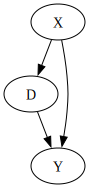

In [2]:
# Grafo indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("X", "D")
g.edge("X", "Y")
g


#### DAG 2 
Esse exemplo é sutilmente diferente do primeiro. No exemplo anterior, $X$ foi observado. Sabemos que isso foi observado porque as arestas diretas de $X$ para $D$ e $Y$ eram linhas sólidas. Mas às vezes existe um fator de confusão que não é observado e, quando existe, representamos suas bordas diretas com linhas tracejadas.

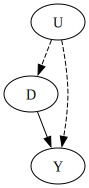

In [3]:
# Grafo indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("U", "D", style="dashed")
g.edge("U", "Y", style="dashed")
g

#### DAG 3

De acordo com o modelo de capital humano de Becker, a educação aumenta o produto marginal de uma pessoa e, uma vez que os trabalhadores recebem o seu produto marginal em mercados competitivos, a educação também aumenta os seus rendimentos. Mas a educação universitária não é aleatória; é escolhido de forma ideal, dadas as preferências subjetivas e as restrições de recursos de um indivíduo. Representamos isso com o seguinte DAG. Como sempre, deixe $D$ ser o tratamento (por exemplo, educação universitária) e $Y$ ser o resultado de juros (por exemplo, lucros). Além disso, deixe $EP$ ser a educação dos pais, $R$ ser renda familiar, e $B$ ser fatores de fundo não observados, como genética, ambiente familiar e capacidade mental.

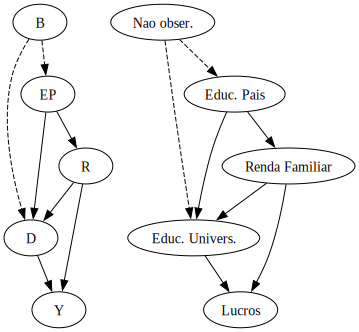

In [4]:
# Grafo indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("B", "D", style="dashed")
g.edge("B", "EP", style="dashed")
g.edge("D", "Y")
g.edge("EP", "D")
g.edge("EP", "R")
g.edge("R", "D")
g.edge("R", "Y")

# Grafo apresentando exemplo
g.edge("Nao obser.", "Educ. Univers.", style="dashed")
g.edge("Nao obser.", "Educ. Pais", style="dashed")
g.edge("Educ. Univers.", "Lucros")
g.edge("Educ. Pais", "Educ. Univers.")
g.edge("Educ. Pais", "Renda Familiar")
g.edge("Renda Familiar", "Educ. Univers.")
g.edge("Renda Familiar", "Lucros")
g

Efeito Causal da educação sobre os rendimentos

* D → Y

Caminhos de porta dos fundos:

* D ← R → Y
* D ← EP → R → Y
* D ← B → EP → R → Y

O problema, porém, com caminhos de backdoor abertos é que eles criam correlações sistemáticas e independentes entre $D$ e $Y$. Dito de outra forma, a presença de caminhos de porta dos fundos abertos introduz viés na comparação entre trabalhadores instruídos e menos instruídos.

Podemos controlar a renda familiar e fechar os caminhos de porta dos fundos!

E se os fatores não observáveis (genética, ambiente familiar e capacidade mental) também afetarem o resultado?

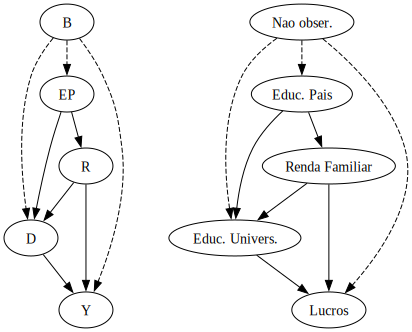

In [4]:
# Grafo indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("B", "D", style="dashed")
g.edge("B", "EP", style="dashed")
g.edge("B", "Y", style="dashed")
g.edge("D", "Y")
g.edge("EP", "D")
g.edge("EP", "R")
g.edge("R", "D")
g.edge("R", "Y")

# Grafo apresentando exemplo
g.edge("Nao obser.", "Educ. Univers.", style="dashed")
g.edge("Nao obser.", "Educ. Pais", style="dashed")
g.edge("Nao obser.", "Lucros", style="dashed")
g.edge("Educ. Univers.", "Lucros")
g.edge("Educ. Pais", "Educ. Univers.")
g.edge("Educ. Pais", "Renda Familiar")
g.edge("Renda Familiar", "Educ. Univers.")
g.edge("Renda Familiar", "Lucros")
g

Repare que a inclusão desse novo caminho de backdoor criou um problema porque nossa estratégia de condicionamento **não satisfaz mais o critério de backdoor**. Mesmo controlando para $R$, ainda existem correlações espúrias entre $D$ e $Y$ devido ao caminho $D ← B → Y$ da porta dos fundos. Não teremos interpretações corretas sobre a relação causal entre $D$ e $Y$.

#### DAG 5 - Viés de Seleção Amostral (Selection Bias / Collider Bias)

A inclusão da **Colisora** ($X$) que é afetada pelo tratamento ($D$) e pela variável de resultado ($Y$) é fonte de viés de seleção. Há desbalanceamento da amostra.

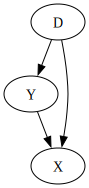

In [5]:
# Grafo indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("D", "X")
g.edge("Y", "X")
g

#### DAG 6

Outro tipo de inclusão de controle excessivo, como uma **colisora excluída da relação** (R), pode gerar mais fonte de viés.

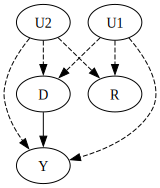

In [7]:
# Grafo indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("U1", "R", style="dashed")
g.edge("U2", "R", style="dashed")
g.edge("U1", "D", style="dashed")
g.edge("U2", "D", style="dashed")
g.edge("U1", "Y", style="dashed")
g.edge("U2", "Y", style="dashed")
g.edge("D", "Y")
g

Controlando para $R$ só piora as coisas, porque abre o terceiro e quarto caminhos dos fundos.

#### DAG 7

Exemplo de *Discriminação de gênero*. (Mediação)

* D: Discriminação
* O: Classificação Ocupacional
* Y: Salários

Assumindo que as mulheres tenham produtividade idêntica a dos homens (Não há efeito dos gêneros sobre os salários). Assim, se pudéssemos controlar o efeito da discriminação, o coeficiente da regressão apresentaria resultado nulo.

Estamos interessados ​​em estimar o efeito da própria discriminação. 

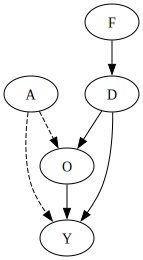

In [8]:
# Grafo indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("F", "D")
g.edge("D", "O")
g.edge("O", "Y")
g.edge("A", "Y", style="dashed")
g.edge("A", "O", style="dashed")
g

*Caminhos:*

1. D → O → Y
2. D → O ← A → Y

O primeiro caminho não é um caminho backdoor; pelo contrário, é um caminho pelo qual a **discriminação é mediada pela profissão** antes que a discriminação tenha efeito sobre os rendimentos.
* mulheres são discriminadas, o que, por sua vez, afecta os empregos que ocupam e, como resultado de ocuparem empregos marginalmente piores, as mulheres recebem menos.

O segundo caminho está relacionado a esse canal, mas é um pouco mais complicado. Neste caminho, a capacidade não observada afecta tanto os empregos que as pessoas conseguem como os seus rendimentos.

**Interpretação geral em termos de regressão**: Se regredirmos D em Y, isso produz o **efeito total da discriminação** sobre os rendimentos como do **efeito mediado da discriminação** sobre os rendimentos através da Ocupação profissional. Mas digamos que queremos **controlar a ocupação** porque queremos comparar homens e mulheres em empregos semelhantes. O **controle da ocupação** na regressão **fecha o canal de mediação**, mas depois abre o segundo canal (O é colisora!). Esta é a razão pela qual não podemos apenas controlar a ocupação. Tal controle introduz ironicamente novos padrões de viés. Logo, não possuímos uma estratégia de identificação que satisfaça o critério da porta dos fundos. 

**Considerações sobre os Viéses nas Estimações dos Efeitos Causais:**

Nós nos preocupamos com caminhos de *backdoor abertos* porque eles criam correlações sistemáticas e não causais entre a variável causal de interesse ($D$) e o resultado ($Y$). Em termos de regressão, caminhos de *backdoor abertos* introduzem viés de variável omitida e, pelo que você sabe, o viés é tão ruim que pode até inverter totalmente o sinal do coeficiente estimado. Nosso objetivo, então, é fechar esses caminhos backdoor. E se pudermos fechar todos os caminhos de backdoor abertos, então poderemos isolar o efeito causal.

* Viés de Variável Omitida (Confusora/Confounding variable): variáveis relevantes são omitidas do modelo empírico (Acontece quando o tratamento e o resultado compartilham uma causa comum). 
* Viés de Seleção (Viés de Seleção Estrutural / Seleção pelo tratamento, ou controle excessivo): Questões além da omissão simples de uma variável, agora a questão torna-se relacionada a um possível desequilíbrio na amostra (por exemplo, um desequilíbrio entre os indivíduos tratados e controle) provocado por um processo de seleção da amostra não aleatório. Além disso, o pesquisador deve cuidar com a construção do modelo empírico porque a inclusão de algumas variáveis (colisoras) pode gerar viés de seleção (e também desbalancear a amostra).
  * Adição de Colisora (ou dependente de colisora) na regressão.
  * Adição de Mediadora (caso abra novo caminho backdoor).


### Covariáveis e Variáveis de Controle

**Definições Gerais**

A partir da teoria dos grafos causais proposta por Judea Pearl, o efeito causal (direto) é identificado quando controlamos, minimamente, todos os caminhos de porta dos fundos (Backdoor). As variáveis que são utilizadas para controlar os caminhos de porta dos fundos são chamadas de **Variáveis de Controle**. 

Os termos "Covariáveis" e "Controles" (Variáveis de controle) não possuem definições estritas, ou seja, podem variar dentro de áreas de pesquisa específicas. Tecnicamente, essas **variáveis de controle** não são de interesse direto para o pesquisador. No entanto, elas são importantes para **controlar os caminhos de porta dos fundos** e, assim, isolar o efeito causal. A ideia é que a **covariável** é uma **variável de controle que "covaria"** (contínuas e medidas em um intervalo), enquanto as **variáveis de controle não covaria** (binárias ou categóricas / Nominais).

#### Good Controls
  
Os "Good Controls" são aquelas variáveis de controle que buscam cumprir com as recomendações de Pearl. Ou seja, são aquelas que afetam ao tratamento e ao resultado (confundidor). A literatura argumenta que deveríamos também adicionar controles que sejam bons preditores do resultado, mesmo que não estejam bloqueando os fatores de confusão, porque reduzem a variância das nossas estimativas. No entanto, **NÃO devemos adicionar controles** que sejam apenas **bons preditores do TRATAMENTO**, porque aumentarão a variância das estimativas dos coeficientes.

#### Bad Controls

Os "Bad Controls" são aqueles que geram viés de seleção (controle excessivo). Exemplo clásico de Bad control é o uso da variável renda (ou PIB) é normalmente uma variável de resultado. Em outras palavras, são aquelas variáveis que costumam ser variáveis dependentes em outros estudos. (pg.47, Angrist & Pischke, 2009). Na abordagem de Pearl, são como as variáveis colisoras que abrem novos caminhos de porta dos fundos. **Proxy Control**: Se a variável proxy não for uma boa representação da variável não observada, sua inclusão no modelo de regressão pode piorar a situação, introduzindo mais viés em vez de corrigi-lo.


#### Considerações gerais sobre Covariáveis e Variáveis de Controle

Como regra geral, inclua sempre **fatores de confusão** e variáveis ​​que sejam **bons preditores de Y no seu modelo**. Sempre exclua variáveis ​​que sejam bons preditores apenas da variável de tratamento ($D$), atenção com mediadoras ou efeito comum do tratamento e o resultado (colisora). Outra questão relevante, o "timming" importa. Variáveis medidas antes do tratamento são boas candidatas a variáveis de controle.


